In [129]:
import datetime
import numpy
import os
from matplotlib import pyplot as plt
import matplotlib
from scipy.stats import chisquare

In [130]:
#file paths
s_path = os.path.join(os.path.expanduser('~'), 'Documents', 'Talent Games', 
  'analytics', 'FB_stocks_4years_daily.txt')
c_path = os.path.join(os.path.expanduser('~'), 'Documents', 'Talent Games', 
  'analytics', 'FB_commits_corporate_4years_daily.txt')

In [131]:
date_list = []
stocks_raw = []
commits_raw = []
stocks_list = []
commits_list = []
stocks_std = []
commits_std = []
day_list = []
with open(s_path) as s:
  stocks_raw = s.readlines()
with open(c_path) as c:
  commits_raw = c.readlines()

In [132]:
prev_month = ""
std_calc = []
#stocks
for i in stocks_raw:
  line = i.split("\t")
  date_string = line[0]
  month = date_string[5:7]
  date_list.append(date_string)
  stock = float(line[1])
  stocks_list.append(stock)
  #for the first value
  if(stocks_raw.index(i) == 0):
    prev_month = month
  if(month != prev_month):
    stocks_std.append((numpy.std(std_calc)))
    prev_month = month
    std_calc = []
    std_calc.append(stock)
  else:
    prev_month = month
    std_calc.append(stock)
stocks_std.append((numpy.std(std_calc)))
  

In [133]:
prev_month = ""
std_calc = []
#commits
for i in commits_raw:
  line = i.split("\t")
  date_string = line[0]
  month = date_string[5:7]
  commits = float(line[1])
  #for the first value
  if(commits_raw.index(i) == 0):
    prev_month = month
  #outlier
  if date_string in date_list:
    if (commits > 3000):
        commits = 300
    commits_list.insert(date_list.index(date_string), commits)
    if(month != prev_month):
        commits_std.append((numpy.std(std_calc)))
        prev_month = month
        std_calc = []
        std_calc.append(commits)
    else:
        prev_month = month
        std_calc.append(commits)
commits_std.append((numpy.std(std_calc)))
        
for i in range (0, len(commits_list)):
    if commits_list[i] == None:
        commmits_list[i] = 0

In [134]:
#calculating correlation coefficients
coeff_list = []
offset_list = [0,1,2,3,4,5,6,7,8,9,10,11]
size = len(commits_std)
for i in offset_list:
    rel_matrix = numpy.corrcoef(commits_std[0:size-i],stocks_std[i:size])
    coeff_list.append(rel_matrix[0,1])

No handles with labels found to put in legend.


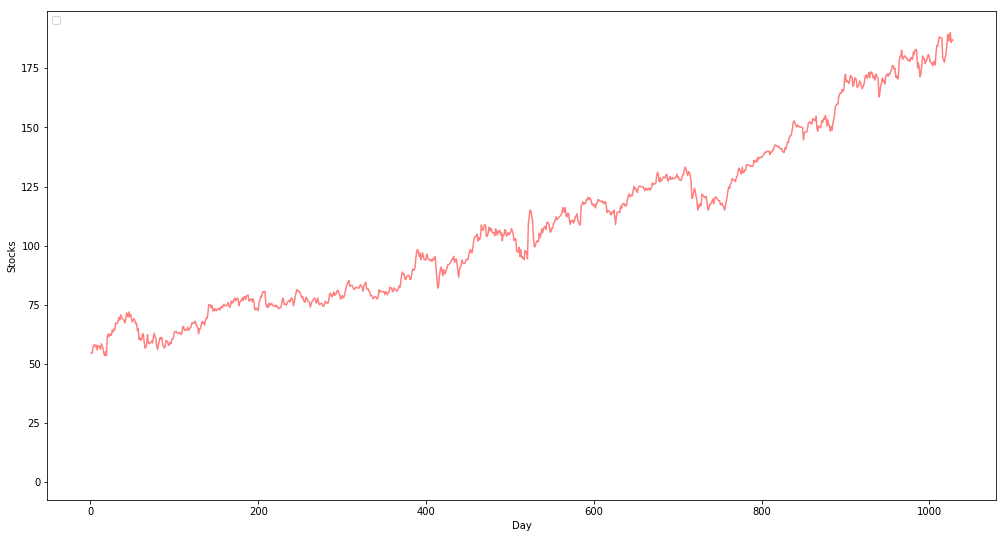

No handles with labels found to put in legend.


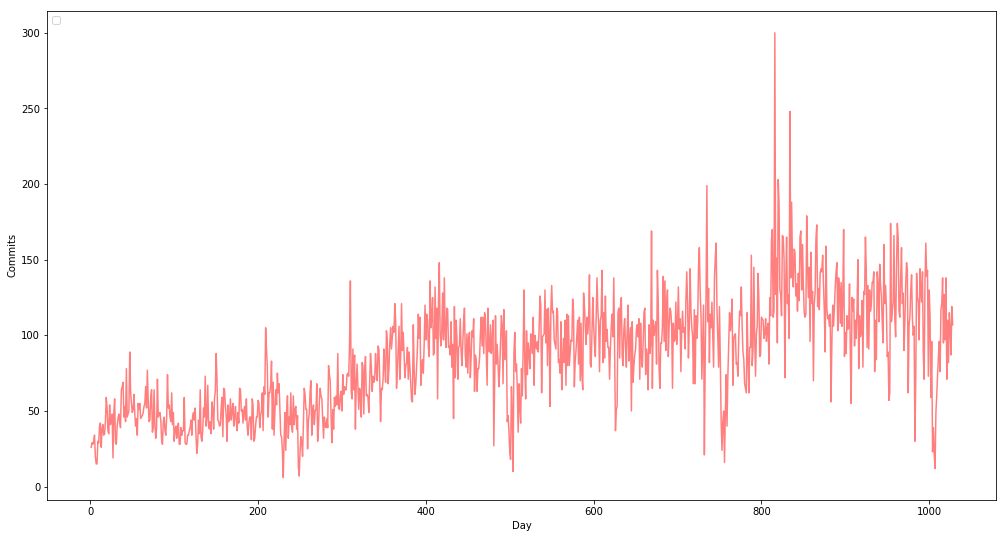

No handles with labels found to put in legend.


offset 0: 0.05705382179066016
offset 1: 0.18445738088518748
offset 2: 0.09829398236871992
offset 3: 0.1877015479371648
offset 4: 0.2647555812771757
offset 5: 0.09664719675175135
offset 6: 0.057010238574760445
offset 7: 0.3498415762093351
offset 8: 0.13717980953838305
offset 9: -0.05743389170903581
offset 10: 0.19141164639500438
offset 11: 0.104721503161475


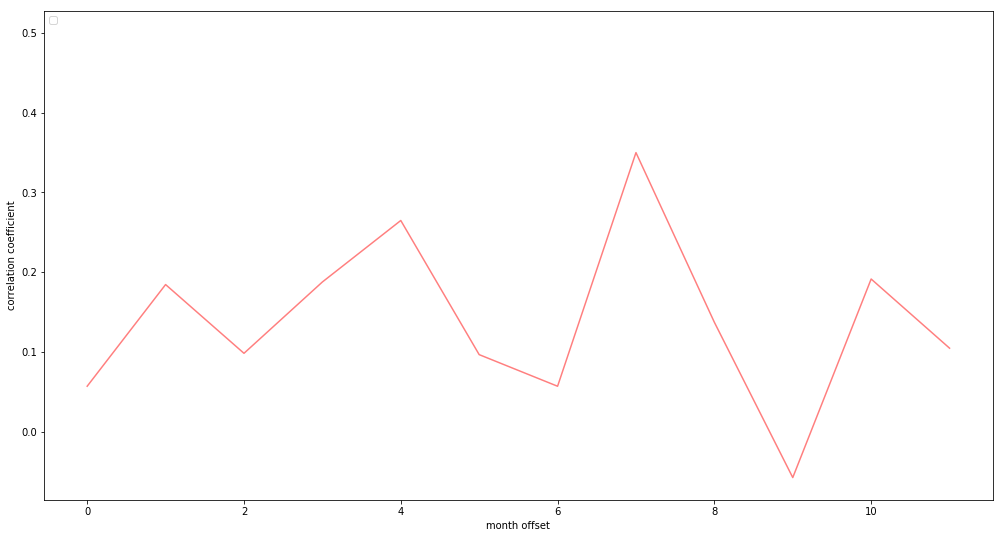

Power_divergenceResult(statistic=16215.659132678104, pvalue=0.0)
[26.0, 29.0, 28.0, 30.0, 34.0, 20.0, 15.0, 15.0, 30.0, 29.0, 40.0, 42.0, 26.0, 38.0, 41.0, 34.0, 35.0, 43.0, 59.0, 52.0, 37.0, 35.0, 54.0, 41.0, 45.0, 48.0, 19.0, 49.0, 58.0, 29.0, 28.0, 40.0, 45.0, 48.0, 43.0, 39.0, 64.0, 66.0, 69.0, 46.0, 53.0, 43.0, 78.0, 46.0, 48.0, 50.0, 89.0, 63.0, 55.0, 49.0, 51.0, 61.0, 48.0, 40.0, 45.0, 34.0, 55.0, 51.0, 55.0, 45.0, 46.0, 47.0, 49.0, 53.0, 55.0, 66.0, 52.0, 77.0, 57.0, 43.0, 44.0, 59.0, 64.0, 36.0, 39.0, 64.0, 41.0, 32.0, 39.0, 71.0, 46.0, 48.0, 49.0, 44.0, 31.0, 28.0, 43.0, 46.0, 37.0, 34.0, 46.0, 74.0, 52.0, 54.0, 46.0, 43.0, 62.0, 41.0, 49.0, 30.0, 38.0, 40.0, 32.0, 38.0, 42.0, 28.0, 28.0, 39.0, 34.0, 37.0, 37.0, 59.0, 29.0, 28.0, 28.0, 34.0, 34.0, 37.0, 39.0, 44.0, 34.0, 47.0, 49.0, 44.0, 52.0, 33.0, 22.0, 29.0, 44.0, 35.0, 64.0, 33.0, 30.0, 37.0, 52.0, 46.0, 73.0, 40.0, 45.0, 67.0, 40.0, 38.0, 43.0, 35.0, 56.0, 51.0, 38.0, 58.0, 63.0, 88.0, 71.0, 44.0, 43.0, 40.0, 41.0, 52.0

In [135]:
for i in range (0, len(commits_list)):
    day_list.append(i+1)

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 17
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

#day vs stocks
plt.plot(day_list, stocks_list, 2, c="red", alpha=0.5)
plt.xlabel("Day")
plt.ylabel("Stocks")
plt.legend(loc=2)
plt.show()

#day vs commits
plt.plot(day_list, commits_list, 200, c="red", alpha=0.5)
plt.xlabel("Day")
plt.ylabel("Commits")
plt.legend(loc=2)
plt.show()

#month offset vs correlation coefficient
plt.plot(offset_list, coeff_list, 0.5, c="red", alpha=0.5)
plt.xlabel("month offset")
plt.ylabel("correlation coefficient")
plt.legend(loc=2)
for i in coeff_list:
    print("offset "+str(coeff_list.index(i))+": "+str(i))
plt.show()

print(chisquare(commits_list))
print(commits_list)